### IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns',999)

In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from scipy.stats import normaltest,f_oneway
from scipy.stats import ttest_ind

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()
et = ExtraTreeRegressor()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
abr = AdaBoostRegressor()
br = BaggingRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

### READING THE DATA SET

In [ ]:
data=pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### NULL VALUE'S CHECK

In [ ]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### MEASURES OF CENTRAL TENDENCY

In [ ]:
data[['Customer Lifetime Value','Income','Monthly Premium Auto','Total Claim Amount']].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,434.088794
std,6870.967608,30379.904734,34.407967,290.500092
min,1898.007675,0.000000,61.000000,0.099007
25%,3994.251794,0.000000,68.000000,272.258244
50%,5780.182197,33889.500000,83.000000,383.945434
75%,8962.167041,62320.000000,109.000000,547.514839
max,83325.381190,99981.000000,298.000000,2893.239678


### SHAPE OFTHE DATA SET

In [ ]:
data.shape

(9134, 24)

### DATA VISUALIZATION AND INFERENCES

#### UNIVARIATE ANALYSIS

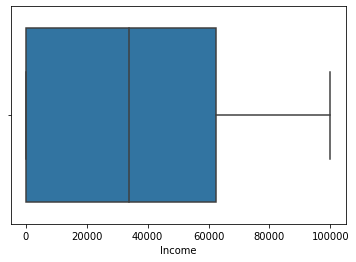

In [ ]:
sns.boxplot(data['Income'])
plt.show()

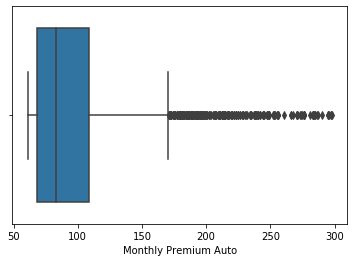

In [ ]:
sns.boxplot(data['Monthly Premium Auto'])
plt.show()

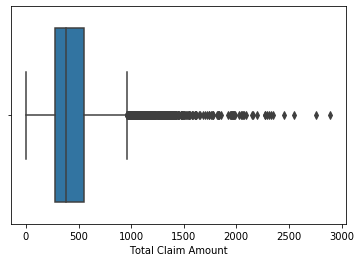

In [ ]:
sns.boxplot(data['Total Claim Amount'])
plt.show()

- As we can see that there are outliers in the total claim amount and also in monthly premium auto , usually we remove the outliers for a better model.
- since our dataset is related to insurance and banking industry, we must be accept the outliers,as they can be our potential customers.
- And there are no outliers in the income.
- Conclusion: No outlier treatment required.

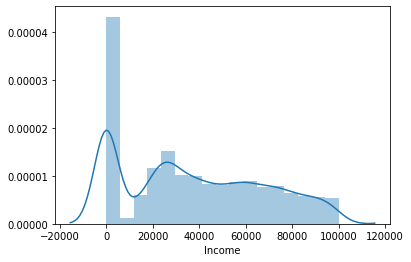

In [ ]:
sns.distplot(data['Income'])
plt.show()

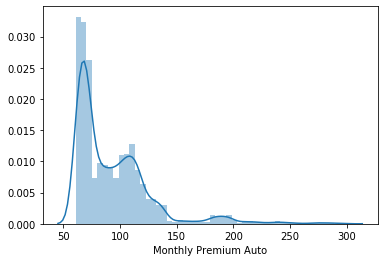

In [ ]:
sns.distplot(data['Monthly Premium Auto'])
plt.show()

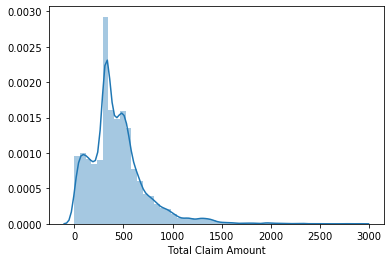

In [ ]:
sns.distplot(data['Total Claim Amount'])
plt.show()

As we can see that none of the continuous variables are normally distributed.
So in our case , we want to make the distributions normal, we can apply some transformations to the data and see if we can achieve a normally distributed variable.

#### TRANSFORMATION OF THE NUMERICAL VARIABLES

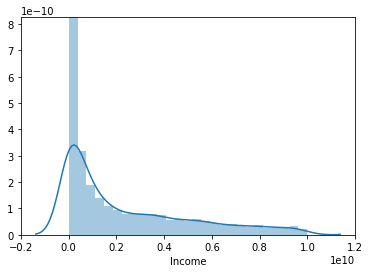

In [ ]:
sns.distplot(data['Income']**2)
plt.show()

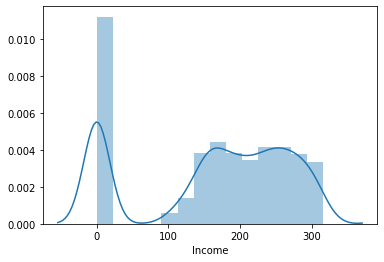

In [ ]:
sns.distplot(data['Income']**(1/2))
plt.show()

As we can see that while we are trying to transform the data to make it normal,rather the distribution is getting skewed, or is having multiple peaks which again is a problem to our model, hence we just stick with the same distribution of the variable.

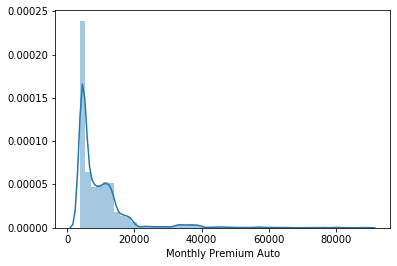

In [ ]:
sns.distplot(data['Monthly Premium Auto']**(2))
plt.show()

The monthly premium auto has multiple peaks,so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE) but as we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again.

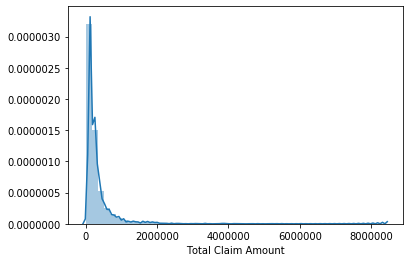

In [ ]:
sns.distplot(data['Total Claim Amount']**2)
plt.show()

Again for the total claim amount after applying the transformation's the data is getting skewed, and hence we stick to the actual distibution of the data.

Conclusion: No matter what power transformation we are applying to the numerical variables, it is still not getting normally distributed, and moreover the data is getting skewed, so rather we will just stick with the actual distribution 

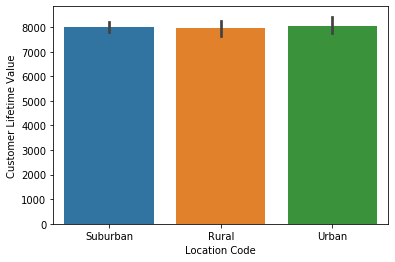

In [ ]:
sns.barplot(x = 'Location Code',y='Customer Lifetime Value',data = data)
plt.show()

The average customer lifetime value of the customer who stay in different location code is the same so while creating the model we can drop this.

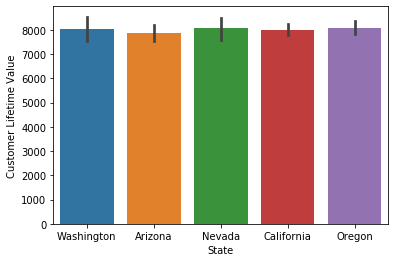

In [ ]:
sns.barplot(x = 'State',y='Customer Lifetime Value',data = data)
plt.show()

The average customer lifetime value of the customer who stay in different state is same and we can drop this also

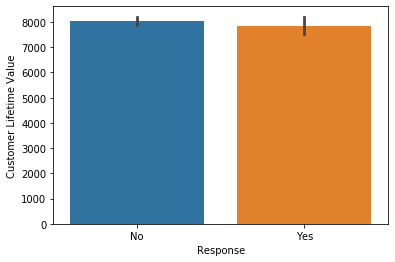

In [ ]:
sns.barplot(x = 'Response',y='Customer Lifetime Value',data = data)
plt.show()

The average customer lifetime value for both of them is same.

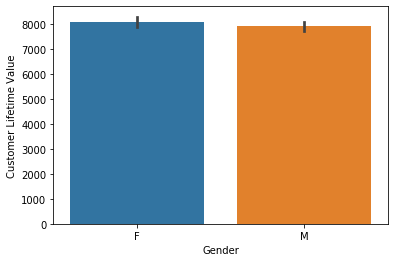

In [ ]:
sns.barplot(x = 'Gender',y='Customer Lifetime Value',data = data)
plt.show()

We can see that the average customer lifetime value is same for both male and female.

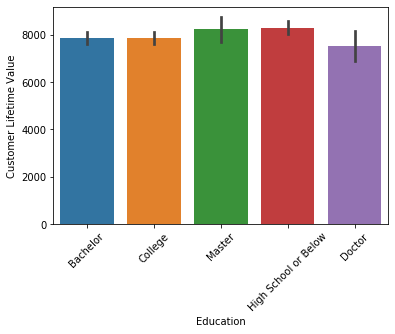

In [ ]:
sns.barplot(x = 'Education',y='Customer Lifetime Value',data = data)
plt.xticks(rotation=45)
plt.show()

We can also see that education is not a significant feature for assessing the lifetime value of the customer.

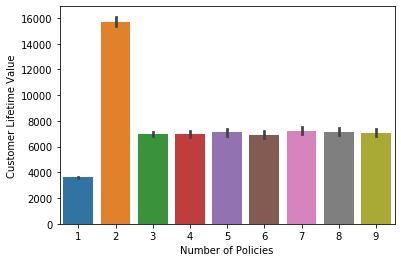

In [ ]:
sns.barplot(x = 'Number of Policies',y='Customer Lifetime Value',data = data)
plt.show()

We can see a pattern here, customers who have taken only 1 policy have lower customer lifetime value, and customers who have taken 3 or greater show a similar trend, so we can combine all of them into one bin, and we can also see that the customers who have taken 2 policies have very high customer lifetime value comparitively.

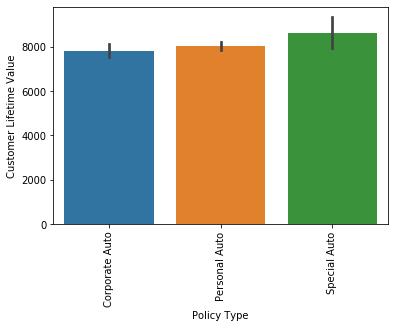

In [ ]:
sns.barplot(x = 'Policy Type',y='Customer Lifetime Value',data = data)
plt.xticks(rotation = 90)
plt.show()

There isn't much difference in the customer lifetime value w.r.t what policy type he has taken, all we need is how much revenue a customer can bring to the company, so it doesnt matter what type of policy he/she has chosen.

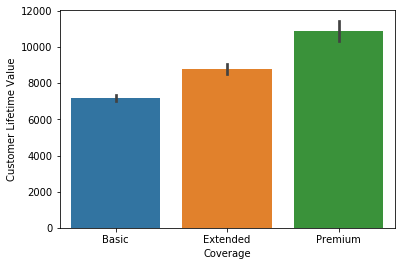

In [ ]:
sns.barplot(x = 'Coverage',y='Customer Lifetime Value',data = data)
plt.show()

Customer Lifetime Value is different for different types of coverage.

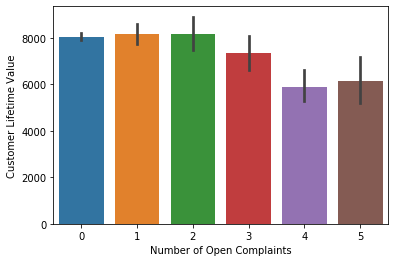

In [ ]:
sns.barplot(x = 'Number of Open Complaints',y='Customer Lifetime Value',data = data)
plt.show()

Number of open complaints also show kind of similar trend, where people who have complaints 2 or lesser have a similar pattern but where as >3 do not show any pattern we will have to do statistical test to understand if this feature is really significant or not

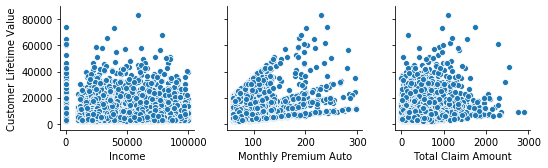

In [ ]:
sns.pairplot(y_vars='Customer Lifetime Value',x_vars=['Income','Monthly Premium Auto','Total Claim Amount'],data = data)
plt.show()


We can clearly see that there is a linear relationship between Customer lifetime value and monthly premium auto, but we do not see any relationship between income and the total claim amount.

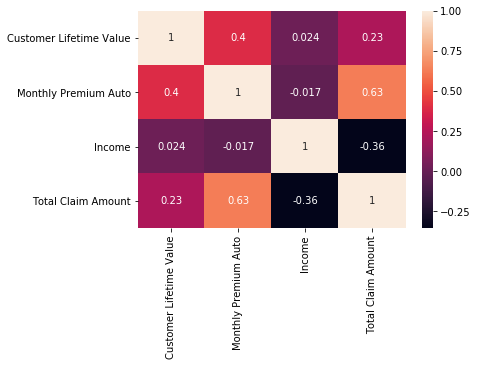

In [ ]:
sns.heatmap(data[['Customer Lifetime Value','Monthly Premium Auto','Income','Total Claim Amount']].corr(),annot = True)
plt.show()


And we can clearly see in the correlation map, that customer lifetime value has a better correlation with monthly premium auto and acceptable co relation with total claim amount, but it show's no relationship with income, so again with all the visualization's we can come to the conclusion that we can dis regard the INCOME feature.

### BASE MODEL USING OLS

##### Using label encoding just for the purpose of looking at the base model, encoding technique's may change furthur(one-hot encoding is used)

In [ ]:
cols = data.select_dtypes(object).columns
for i in cols:
    data[i] = le.fit_transform(data[i])

In [ ]:
X = data.drop('Customer Lifetime Value',axis=1)
y = data['Customer Lifetime Value']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(6393, 23)
(2741, 23)
(2741,)
(6393,)


In [ ]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

Coefficients: [-6.53047225e-02 -3.59247697e+01 -7.59207272e+02 -2.18491598e+02
  1.52093317e+02 -4.43441182e+00 -1.00947774e+02 -2.35768901e+01
  4.12753853e-03 -3.02804230e+01 -2.22636108e+02  7.78574107e+01
  8.28124733e+00  2.50392872e+00 -2.91566716e+02  6.14992641e+01
  1.63149422e+02  4.20724693e+01 -3.90118789e+02  9.26511745e+01
 -2.43179192e-02  5.50268662e+01  1.12140039e+02]
Intercept: 931.741463758226
R^2 score: 0.16465342044170292
R^2 score for train: 0.168971654854021
R^2 score for test: 0.15581417034347667


In [ ]:
X_sm = X
X_sm = sm.add_constant(X_sm)
lm = sm.OLS(y,X_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.166
Model:                                 OLS   Adj. R-squared:                  0.164
Method:                      Least Squares   F-statistic:                     78.97
Date:                     Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                             21:29:50   Log-Likelihood:                -92829.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9110   BIC:                         1.859e+05
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1071.0909    499.588      2.144      0.032      91.786    2050.396
Customer                         -0.0768      0.025     -3.078      0.002      -0.126      -0.028
State                            30.1424     51.092      0.590      0.555     -70.010     130.294
Response                       -450.2135    192.547     -2.338      0.019    -827.648     -72.779
Coverage                       -186.3677    113.640     -1.640      0.101    -409.127      36.392
Education                        93.8688     47.764      1.965      0.049       0.241     187.496
Effective To Date                -6.6838      3.869     -1.727      0.084     -14.268       0.901
EmploymentStatus               -105.0512     73.564     -1.428      0.153    -249.252      39.150
Gender                         -140.1122    132.592     -1.057      0.291    -400.022     119.797
Income                            0.0021      0.003      0.659      0.510      -0.004       0.009
Location Code                   109.2173    116.530      0.937      0.349    -119.207     337.641
Marital Status                 -240.8148    110.614     -2.177      0.030    -457.644     -23.986
Monthly Premium Auto             82.7641      2.923     28.315      0.000      77.034      88.494
Months Since Last Claim           6.9809      6.543      1.067      0.286      -5.845      19.807
Months Since Policy Inception    -0.8089      2.372     -0.341      0.733      -5.459       3.841
Number of Open Complaints      -251.7392     72.327     -3.481      0.001    -393.516    -109.963
Number of Policies               64.1685     27.648      2.321      0.020       9.971     118.366
Policy Type                     439.8934    290.903      1.512      0.131    -130.343    1010.129
Policy                          -48.3025     86.215     -0.560      0.575    -217.303     120.698
Renew Offer Type               -349.4798     68.455     -5.105      0.000    -483.668    -215.292
Sales Channel                    20.8988     62.267      0.336      0.737    -101.158     142.956
Total Claim Amount               -0.5866      0.362     -1.621      0.105      -1.296       0.123
Vehicle Class                    44.8664     32.409      1.384      0.166     -18.663     108.396
Vehicle Size                    187.8871    123.302      1.524      0.128     -53.813     429.587
==============================================================================
Omnibus:                     5656.816   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64358.326
Skew:                           2.847   Prob(JB):                         0.00
Kurtosis:                      14.692   Cond. No.                 

After Looking at the base model and the p-value of the feature's, we know that the Hypothesis for the feature's is

H0: Feature is not significant
Ha: Feature is significant
But we just cant conclude the significance of the feature's just by base model and also without using any of the feature engineering technique's we have at our disposal. So we will first try to do the statistical test's of the feature for the feature selection, we can also use the forward selection and backward elimination , we will use the Variance inflation factor

### ASSUMPTIONS OF LINEAR REGRESSION.
### Linearity

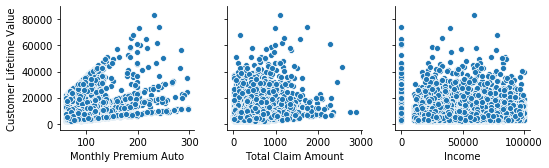

In [ ]:
sns.pairplot(x_vars=['Monthly Premium Auto','Total Claim Amount','Income'],y_vars =['Customer Lifetime Value'],data = data)
plt.show()

We don't see any linear relationship between the variables and the Y varible , which fails the first assumption of linear regression.

### Mean Of Residuals

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [ ]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
residuals = y_pred-y_test
mean_of_residuals = np.mean(residuals)
print(f"The mean of the residuals is {mean_of_residuals}")

The mean of the residuals is -48.720195412063156


The 2nd assumption is that the mean of the residuals must be close to zero, which again fails.

### Homoscedasticity_test

In [ ]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals,X_test)
lzip(name, test)

[('F statistic', 1.386631262828131), ('p-value', 1.0799648075037025e-09)]

H0: Error terms are homoscedastic

Ha: Error terms are not homoscedastic

p-value < 0.05 reject null hypothesis, error terms are not homoscedastic

### Test of normality of residuals

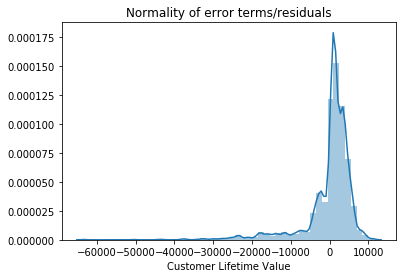

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The distribution clearly show's that the residuals are not normally distributed, and the third assumption also fails.

### No Autocorrelation

In [ ]:
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.07495722040140565

Ho: Autocorrelation is absent

Ha: Autocorrelation is present

The P-value is >0.05 ,we fail to reject the null hypothesis, autocorrelation is absent.

### NO MULTI COLLINEARITY

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
vif,1.002315,1.001907,1.052902,1.285492,1.008412,1.003331,2.275172,1.016928,2.262305,1.153125,1.148481,2.341101,1.005443,1.014143,1.003434,1.010753,4.437447,4.436956,1.101067,1.026306,2.556749,1.044654,1.015869


So, multicollinearity exists.

### STATISTICAL ANALYSIS

Considering CLV (Customer Lifetime Value) as the target variable, we shall try to understand how each of the independent variables are contributing towards the target variable.

Since our target variable is a continuous variable, we will have to perform ANOVA to understand how significant are the independent variables towards target variable.

For ANOVA,

Null hypothesis is that there is no significant difference among the groups
Alternative hypothesis is that there is at least one significant difference among the groups

#### State vs Customer Lifetime Value

In [ ]:
data=pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')

In [ ]:
State = data.groupby('State')
Washington = State.get_group('Washington')['Customer Lifetime Value']
Arizona = State.get_group('Arizona')['Customer Lifetime Value']
Nevada = State.get_group('Nevada')['Customer Lifetime Value']
California = State.get_group('California')['Customer Lifetime Value']
Oregon = State.get_group('Oregon')['Customer Lifetime Value']

In [ ]:
for i in [Washington,Arizona,Nevada,California,Oregon]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=589.985409403956, pvalue=7.69655090624974e-129) 

NormaltestResult(statistic=1123.931182802557, pvalue=8.73865582665683e-245) 

NormaltestResult(statistic=531.43144944664, pvalue=3.9914160352323387e-116) 

NormaltestResult(statistic=2047.3388756109375, pvalue=0.0) 

NormaltestResult(statistic=1836.7206700158117, pvalue=0.0) 



CLV of all the 'States' follow a normal distribution. Hence, we can perform ANOVA test.

In [ ]:
f_oneway(Washington,Arizona,Nevada,California,Oregon)

F_onewayResult(statistic=0.27289285462119284, pvalue=0.8955985932127517)

ALL STATES HAVE SAME MEAN VALUE FOR CLV

pvalue > 0.05 implies that there is no significant difference in the mean of target variable which means 'State' feature is not significant for predicting 'Customer Lifetime Value'

#### Customer Response to marketing calls vs Customer Lifetime Value

In [ ]:
Response = data[['Customer Lifetime Value','Response']].groupby('Response')
No = Response['Customer Lifetime Value'].get_group('No')
Yes = Response['Customer Lifetime Value'].get_group('Yes')

In [ ]:
for i in [No,Yes]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=5322.477891516728, pvalue=0.0) 

NormaltestResult(statistic=639.4950779413575, pvalue=1.3658664040085885e-139) 



CLV of all the 'Response' follow a normal distribution. Hence, we can perform ANOVA test or test of mean for independent categories.

In [ ]:
ttest_ind(No,Yes)

Ttest_indResult(statistic=0.8533582829612565, pvalue=0.393483030479461)

RESPONE HAVE SAME MEAN VALUE

pvalue > 0.05 implies that there is no significant difference in the mean of target variable which means 'Response' feature is not significant for predicting 'Customer Lifetime Value'

#### Coverage Type vs Customer Lifetime Value

In [ ]:
Coverage = data[['Customer Lifetime Value','Coverage']].groupby('Coverage')
basic = Coverage['Customer Lifetime Value'].get_group('Basic')
extended = Coverage['Customer Lifetime Value'].get_group('Extended')
premium = Coverage['Customer Lifetime Value'].get_group('Premium')

In [ ]:
for i in [basic,extended,premium]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3458.849448301252, pvalue=0.0) 

NormaltestResult(statistic=1947.8731066934433, pvalue=0.0) 

NormaltestResult(statistic=503.3468946321326, pvalue=5.007380445967074e-110) 



CLV of all the 'Coverage' follow a normal distribution. Hence, we can perform ANOVA test.

In [ ]:
f_oneway(basic,extended,premium)

F_onewayResult(statistic=133.67511419504908, pvalue=6.0158970099807e-58)

MEANS ARE NOT SAME FOR COVERAGE

pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Coverage' which means 'Coverage' feature can be a significant for predicting 'Customer Lifetime Value'

#### Education vs Customer Lifetime Value

In [ ]:
Education = data[['Customer Lifetime Value','Education']].groupby('Education')
bachelor = Education['Customer Lifetime Value'].get_group('Bachelor')
college = Education['Customer Lifetime Value'].get_group('College')
highschool = Education['Customer Lifetime Value'].get_group('High School or Below')
master = Education['Customer Lifetime Value'].get_group('Master')
doctor = Education['Customer Lifetime Value'].get_group('Doctor')

In [ ]:
for i in [basic,college,highschool,master,doctor]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3458.849448301252, pvalue=0.0) 

NormaltestResult(statistic=1808.0647185961266, pvalue=0.0) 

NormaltestResult(statistic=1797.622885789157, pvalue=0.0) 

NormaltestResult(statistic=420.3468077537673, pvalue=5.282633163257892e-92) 

NormaltestResult(statistic=207.1795478118804, pvalue=1.0269110120928107e-45) 



CLV of all the categories of 'Education' follow a normal distribution. Hence, we can perform ANOVA test.

In [ ]:
f_oneway(bachelor,college,highschool,master,doctor)

F_onewayResult(statistic=2.4228653480521904, pvalue=0.04603615409468821)

MEANS ARE NOT SAME FOR EDUCATION

pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Education' which means 'Education' feature can be a significant for predicting 'Customer Lifetime Value'

#### Employment Status vs Customer Lifetime Value 

In [ ]:
es = data[['Customer Lifetime Value','EmploymentStatus']].groupby('EmploymentStatus')
employed = es['Customer Lifetime Value'].get_group('Employed')
unemployed = es['Customer Lifetime Value'].get_group('Unemployed')
medleave = es['Customer Lifetime Value'].get_group('Medical Leave')
disabled = es['Customer Lifetime Value'].get_group('Disabled')
retired = es['Customer Lifetime Value'].get_group('Retired')

In [ ]:
for i in [employed,unemployed,medleave,disabled,retired]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3761.129277691408, pvalue=0.0) 

NormaltestResult(statistic=1679.139433825762, pvalue=0.0) 

NormaltestResult(statistic=235.4863106944144, pvalue=7.324826645525092e-52) 

NormaltestResult(statistic=276.0845869374091, pvalue=1.119421586116707e-60) 

NormaltestResult(statistic=99.68654915712415, pvalue=2.256009325581312e-22) 



CLV of all the categories of 'Employment Status' follow a normal distribution. Hence, we can perform ANOVA test.

In [ ]:
f_oneway(employed,unemployed,medleave,disabled,retired)

F_onewayResult(statistic=3.809808710328605, pvalue=0.00425058662383102)

MEANS ARE NOT SAME FOR Employment Status

pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Employment Status' which means 'Employment Status' feature can be a significant for predicting 'Customer Lifetime Value'

#### Gender vs Customer Lifetime Value

In [ ]:
g = data[['Customer Lifetime Value','Gender']].groupby('Gender')
f = g['Customer Lifetime Value'].get_group('F')
m = g['Customer Lifetime Value'].get_group('M')

In [ ]:
for i in [f,m]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2834.0749107540296, pvalue=0.0) 

NormaltestResult(statistic=3243.1471942337193, pvalue=0.0) 



CLV of all the categories of 'Gender' follow a normal distribution. Hence, we can perform ANOVA test or test of mean for independent features.

In [ ]:
ttest_ind(f,m)

Ttest_indResult(statistic=1.300686352501256, pvalue=0.19339865630769232)

MEANS ARE SAME FOR GENDER

pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Gender' which means 'Gender' feature is not significant for predicting 'Customer Lifetime Value'

#### Location Code vs Customer Lifetime Value

In [ ]:
location = data[['Customer Lifetime Value','Location Code']].groupby('Location Code')
sub = location['Customer Lifetime Value'].get_group('Suburban')
urban = location['Customer Lifetime Value'].get_group('Urban')
rural = location['Customer Lifetime Value'].get_group('Rural')

In [ ]:
for i in [sub,urban,rural]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=4001.809435806882, pvalue=0.0) 

NormaltestResult(statistic=941.3620057193798, pvalue=3.8533434657380165e-205) 

NormaltestResult(statistic=1122.9340758970607, pvalue=1.4386781520042673e-244) 



CLV of all the categories of 'Location Code' follow a normal distribution. Hence, we can perform ANOVA test.

In [ ]:
f_oneway(sub,urban,rural)

F_onewayResult(statistic=0.10800210605345337, pvalue=0.8976268526407198)

MEANS ARE SAME FOR LOCATION CODE

pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Location Code' which means 'Location Code' feature is not significant for predicting 'Customer Lifetime Value'

#### Marital Status vs Customer Lifetime Value

In [ ]:
MaritalStatus = data[['Customer Lifetime Value','Marital Status']].groupby('Marital Status')
Married = MaritalStatus['Customer Lifetime Value'].get_group('Married')
Single = MaritalStatus['Customer Lifetime Value'].get_group('Single')
Divorced = MaritalStatus['Customer Lifetime Value'].get_group('Divorced')

In [ ]:
for i in [Married,Single,Divorced]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=3677.216857754807, pvalue=0.0) 

NormaltestResult(statistic=1721.914498898464, pvalue=0.0) 

NormaltestResult(statistic=680.597010523175, pvalue=1.6226952503119905e-148) 



CLV of all the categories of 'Location Code' follow a normal distribution. Hence, we can perform ANOVA test.

In [ ]:
f_oneway(Married,Single,Divorced)

F_onewayResult(statistic=3.317664937589139, pvalue=0.036281036735873)

MEANS ARE NOT SAME Marital Status

pvalue < 0.05 implies that there is significant difference in the mean of target variable for at least on Group of 'Marital Status' which means 'Marital Status' feature can be significant for predicting 'Customer Lifetime Value'


#### Policy vs Customer Lifetime Value

In [ ]:
Policy  = data[['Customer Lifetime Value','Policy']].groupby('Policy')
p3 = Policy['Customer Lifetime Value'].get_group('Personal L3')
p2 = Policy['Customer Lifetime Value'].get_group('Personal L2')
p1 = Policy['Customer Lifetime Value'].get_group('Personal L1')
c3 = Policy['Customer Lifetime Value'].get_group('Corporate L3')
c2 = Policy['Customer Lifetime Value'].get_group('Corporate L2')
c1 = Policy['Customer Lifetime Value'].get_group('Corporate L1')
s3 = Policy['Customer Lifetime Value'].get_group('Special L3')
s2 = Policy['Customer Lifetime Value'].get_group('Special L2')
s1 = Policy['Customer Lifetime Value'].get_group('Special L1')

In [ ]:
for i in [p3,p2,p1,c3,c2,c1,s3,s2,s1]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2454.8806553250483, pvalue=0.0) 

NormaltestResult(statistic=1239.8942061958492, pvalue=5.7596229383194274e-270) 

NormaltestResult(statistic=992.9674497188381, pvalue=2.3980483698011588e-216) 

NormaltestResult(statistic=605.9012411656124, pvalue=2.6928811836326553e-132) 

NormaltestResult(statistic=373.09668872516477, pvalue=9.617970377316392e-82) 

NormaltestResult(statistic=187.8953648881132, pvalue=1.5813934182974064e-41) 

NormaltestResult(statistic=81.04251038237228, pvalue=2.52256560971873e-18) 

NormaltestResult(statistic=98.75159886489641, pvalue=3.6004995993148485e-22) 

NormaltestResult(statistic=19.415176797916622, pvalue=6.0820211456712794e-05) 



In [ ]:
f_oneway(p3,p2,p1,c3,c2,c1,s3,s2,s1)

F_onewayResult(statistic=1.1839990669675131, pvalue=0.3041951364145143)

#### Renew Offer Type vs Customer Lifetime Value

In [ ]:
R  = data[['Customer Lifetime Value','Renew Offer Type']].groupby('Renew Offer Type')
o1 = R['Customer Lifetime Value'].get_group('Offer1')
o2 = R['Customer Lifetime Value'].get_group('Offer2')
o3 = R['Customer Lifetime Value'].get_group('Offer3')
o4 = R['Customer Lifetime Value'].get_group('Offer4')

In [ ]:
for i in [o1,o2,o3,o4]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2617.6948383126864, pvalue=0.0) 

NormaltestResult(statistic=1936.9308789084942, pvalue=0.0) 

NormaltestResult(statistic=815.8559270625346, pvalue=6.904566619974463e-178) 

NormaltestResult(statistic=642.2059295134014, pvalue=3.5217156184052177e-140) 



In [ ]:
f_oneway(o1,o2,o3,o4)

F_onewayResult(statistic=25.83261444494041, pvalue=1.238399930571374e-16)

#### Sales Channel vs Customer Lifetime Value

In [ ]:
Sales  = data[['Customer Lifetime Value','Sales Channel']].groupby('Sales Channel')
agent = Sales['Customer Lifetime Value'].get_group('Agent')
branch = Sales['Customer Lifetime Value'].get_group('Branch')
call = Sales['Customer Lifetime Value'].get_group('Call Center')
web = Sales['Customer Lifetime Value'].get_group('Web')

In [ ]:
for i in [agent,branch,call,web]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2249.8117586071908, pvalue=0.0) 

NormaltestResult(statistic=1778.5170859072064, pvalue=0.0) 

NormaltestResult(statistic=1209.3339649106563, pvalue=2.4915300560589623e-263) 

NormaltestResult(statistic=866.0244616685382, pvalue=8.814091447361906e-189) 



In [ ]:
f_oneway(agent,branch,call,web)

F_onewayResult(statistic=0.8805454785276248, pvalue=0.4502779502550758)

#### Vehicle Class vs Customer Lifetime Value

In [ ]:
VC  = data[['Customer Lifetime Value','Vehicle Class']].groupby('Vehicle Class')
fd = VC['Customer Lifetime Value'].get_group('Four-Door Car')
td = VC['Customer Lifetime Value'].get_group('Two-Door Car')
suv = VC['Customer Lifetime Value'].get_group('SUV')
sc = VC['Customer Lifetime Value'].get_group('Sports Car')
ls = VC['Customer Lifetime Value'].get_group('Luxury SUV')
lc = VC['Customer Lifetime Value'].get_group('Luxury Car')

In [ ]:
for i in [fd,td,suv,sc,ls,lc]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=2591.5563098196517, pvalue=0.0) 

NormaltestResult(statistic=967.8795815175732, pvalue=6.723869874448458e-211) 

NormaltestResult(statistic=911.8062937987764, pvalue=1.0087394816479343e-198) 

NormaltestResult(statistic=256.8651916324882, pvalue=1.6689077848613138e-56) 

NormaltestResult(statistic=93.79133396550114, pvalue=4.300021273979593e-21) 

NormaltestResult(statistic=112.96534867020267, pvalue=2.9504360994555045e-25) 



In [ ]:
f_oneway(fd,td,suv,sc,ls,lc)

F_onewayResult(statistic=267.1581168024349, pvalue=2.085525760212929e-267)

#### Vehicle Size vs Customer Lifetime Value

In [ ]:
VS  = data[['Customer Lifetime Value','Vehicle Size']].groupby('Vehicle Size')
m = VS['Customer Lifetime Value'].get_group('Medsize')
s = VS['Customer Lifetime Value'].get_group('Small')
l = VS['Customer Lifetime Value'].get_group('Large')

In [ ]:
for i in [m,s,l]:
    print(normaltest(i),'\n')

NormaltestResult(statistic=4107.297603156226, pvalue=0.0) 

NormaltestResult(statistic=1277.51103714535, pvalue=3.908435944085235e-278) 

NormaltestResult(statistic=710.5562496753278, pvalue=5.066065984237427e-155) 



In [ ]:
f_oneway(m,s,l)

F_onewayResult(statistic=2.382494601032998, pvalue=0.09237737701331775)

### Furthur Modelling:

#### So we did the EDA and also the Statistical Analysis, so now we can just dis regard the features which we are not significant  for our model.

In [ ]:
data.drop(['State','Customer','Response','EmploymentStatus','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Income','Effective To Date','Education'],axis=1,inplace = True)

In [ ]:
data.head()

,Customer Lifetime Value,Coverage,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Renew Offer Type,Total Claim Amount,Vehicle Class
0,2763.519279,Basic,Married,69,32,5,0,1,Offer1,384.811147,Two-Door Car
1,6979.535903,Extended,Single,94,13,42,0,8,Offer3,1131.464935,Four-Door Car
2,12887.431650,Premium,Married,108,18,38,0,2,Offer1,566.472247,Two-Door Car
3,7645.861827,Basic,Married,106,18,65,0,7,Offer1,529.881344,SUV
4,2813.692575,Basic,Single,73,12,44,0,1,Offer1,138.130879,Four-Door Car


Though the features, months since policy inception, months since last claim, number of open complaints and number of policies are all numerical, but they are discrete numbers and we will consider them as categorical features while preparing the model.

Firstly, according to our EDA, we saw that the number of policies >= 3 have similar trend so we will group all of them as 3

In [ ]:
data['Number of Policies'] = np.where(data['Number of Policies']>2,3,data['Number of Policies'])

Secondly, when we convert the numerical features to categorical, our normal practice is label encoding for ordinal data and one hot for nominal data, but we can also use one hot encoding for ordinal data if there isn't any curse of dimensionality, so we will convert the categorical to numerical with one-hot encoding / dummification.

In [ ]:
new = pd.get_dummies(data,columns=['Coverage','Marital Status','Number of Policies','Renew Offer Type','Vehicle Class'],drop_first=True)

In [ ]:
new.head()

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Coverage_Extended,Coverage_Premium,Marital Status_Married,Marital Status_Single,Number of Policies_2,Number of Policies_3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,2763.519279,69,32,5,0,384.811147,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,6979.535903,94,13,42,0,1131.464935,1,0,0,1,0,1,0,1,0,0,0,0,0,0
2,12887.431650,108,18,38,0,566.472247,0,1,1,0,1,0,0,0,0,0,0,0,0,1
3,7645.861827,106,18,65,0,529.881344,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,2813.692575,73,12,44,0,138.130879,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Spliting the data into train(70) and test(30)

In [ ]:
X = new.drop('Customer Lifetime Value',axis=1)
y = new['Customer Lifetime Value']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(X_test,y_test)

0.6229090552681669

In [ ]:
lr.score(X_train,y_train)

0.6389753771298572

So after removing the unnessary feature's our model is giving is an accuracy of about 60%, we would like to take it 70% in the furthur models.

### Feature Selection-Forward, Backward
#### Forward

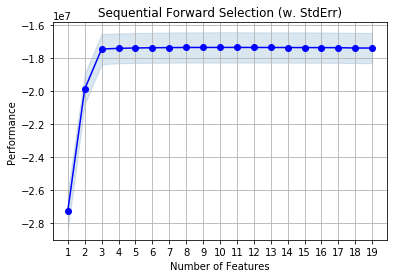

In [ ]:
sfs = SFS(lr, k_features='best', forward=True, floating=False, 
          scoring='neg_mean_squared_error', cv=20)
model = sfs.fit(new.drop('Customer Lifetime Value', axis=1),new['Customer Lifetime Value'])
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (0, 3, 4, 6, 8, 9, 10, 11, 16, 17)


#### Backward

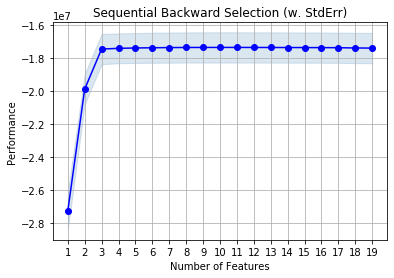

In [ ]:
sfs = SFS(lr, k_features='best', forward=False, floating=False, 
          scoring='neg_mean_squared_error', cv=20)
model = sfs.fit(new.drop('Customer Lifetime Value', axis=1).values,new['Customer Lifetime Value'])
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (0, 3, 4, 6, 8, 9, 10, 11, 16, 17)


In [ ]:
X.columns

Index(['Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Total Claim Amount', 'Coverage_Extended', 'Coverage_Premium',
       'Marital Status_Married', 'Marital Status_Single',
       'Number of Policies_2', 'Number of Policies_3',
       'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3',
       'Renew Offer Type_Offer4', 'Vehicle Class_Luxury Car',
       'Vehicle Class_Luxury SUV', 'Vehicle Class_SUV',
       'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car'],
      dtype='object')

Suprisingly Both the forward and backward selection gave us the same features to select for our model, so we will be sticking to the same features.

In [ ]:
test_X = X[['Monthly Premium Auto','Number of Open Complaints','Total Claim Amount','Coverage_Premium',
            'Marital Status_Single','Number of Policies_2','Number of Policies_3',
            'Renew Offer Type_Offer2','Vehicle Class_SUV','Vehicle Class_Sports Car']]

In [ ]:
train = []
test = []

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(test_X,y,test_size=0.3,random_state=100)

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
test.append(lr.score(X_test,y_test))

In [ ]:
train.append(lr.score(X_train,y_train))

So we can clearly see that the features removed didn't contribute to tell us the differing variance in the data, so it was a good decision to remove those features

In [ ]:
metrics = [r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error]

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
r2 = []
mae = []
mape = []
mse = []

In [ ]:
for i in metrics:
    print(i(y_test,y_pred))
    if i == r2_score:
        r2.append(i(y_test,y_pred))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred))
    else:
        mse.append(i(y_test,y_pred))

0.6229724358599134
2097.807348632866
24.17860337907907
18228661.804602843


We will consider the r2_Score and the Mean absolute percentage error as the metrics we are going to use to measure the model.

### Finding the best sample by random state for each model.

In [ ]:
algo = [abr,gbr,dt,et,etr,br,rfr]

In [ ]:
for i in algo:
    temp = 0
    print(f"New Model{i}")
    for j in range(1,300,1):
        NXT,NXt,NYT,NYt = train_test_split(X,y,test_size=0.3,random_state=j)
        i.fit(NXT,NYT)
        test_score = i.score(NXt,NYt)
        train_score = i.score(NXT,NYT)
        if test_score>temp:
            temp = test_score
            print(j,train_score,temp)

New ModelAdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
1 0.61763944834935 0.5290596511781978
2 0.6026633124586771 0.5947986532718177
4 0.5910850307162052 0.5988921825348192
5 0.6159348238616618 0.6115591454337723
16 0.6123030672297892 0.6218194092484409
35 0.604301380284536 0.6356916966765893
80 0.6053560427729863 0.6399880816765857
New ModelGradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
          

We can see the best sample for each model, and we can also see which model is a good fit and which model is overfitting/underfitting model.

- AdaBoost is good model, but we will have to check for the metrics
- Gradient Boosting is the best model comparitively, again we will check for the metrics
- DecisionTree and the Extra Tree regressor models are not working better for this data set ,as the model is overfitting
- Bagging and random forest regressor models are again overfitting model.

### Decision Tree Regressor

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=159)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
for i in metrics:
    print(i(y_test,y_pred_dt))
    if i == r2_score:
        r2.append(i(y_test,y_pred_dt))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_dt))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_dt))
    else:
        mse.append(i(y_test,y_pred_dt))

0.5377304802002834
1601.0172091415543
12.637718106173477
22802758.22595521


In [ ]:
train.append(dt.score(X_train,y_train))
test.append(dt.score(X_test,y_test))

### Extra Tree Regressor

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=69)

In [ ]:
et.fit(X_train,y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                   max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, min_samples_leaf=1,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   random_state=None, splitter='random')

In [ ]:
y_pred_et = et.predict(X_test)

In [ ]:
for i in metrics:
    print(i(y_test,y_pred_et))
    if i == r2_score:
        r2.append(i(y_test,y_pred_et))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_et))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_et))
    else:
        mse.append(i(y_test,y_pred_et))

0.38015966046556027
1837.7794637697923
13.432310916540496
29653806.277210347


In [ ]:
train.append(et.score(X_train,y_train))
test.append(et.score(X_test,y_test))

In [ ]:
pd.DataFrame({'Model':['Linear Regression','Decision Tree','Extra Tree'],'R2_Score':r2,'MAE':mae,'MAPE':mape,'MSE':mse})

,Model,R2_Score,MAE,MAPE,MSE
0,Linear Regression,0.622972,2097.807349,24.178603,1.822866e+07
1,Decision Tree,0.537730,1601.017209,12.637718,2.280276e+07
2,Extra Tree,0.380160,1837.779464,13.432311,2.965381e+07


We can clearly see that the Linear Regression model is having the best r2_Score, and decision tree and extra tree regressor have no better accuracy that so we will have to build our model using ensemlle technique's, boosting and bagging.

### ENSEMBLE METHODS

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

### AdaBoost

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=83)

In [ ]:
abr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [ ]:
y_pred_abr = abr.predict(X_test)

In [ ]:
for i in metrics:
    print(i(y_test,y_pred_abr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_abr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_abr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_abr))
    else:
        mse.append(i(y_test,y_pred_abr))

0.6366252854909099
2707.8625824916985
30.71334976732772
19324962.495534886


In [ ]:
train.append(abr.score(X_train,y_train))
test.append(abr.score(X_test,y_test))

### Bagging

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=292)
br.fit(X_train,y_train)
y_pred_br = br.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_br))
    if i == r2_score:
        r2.append(i(y_test,y_pred_br))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_br))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_br))
    else:
        mse.append(i(y_test,y_pred_br))

0.7043308080209824
1526.5196519165634
11.589221645617465
15048929.062833099


In [ ]:
train.append(br.score(X_train,y_train))
test.append(br.score(X_test,y_test))

### Extra Tree

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=69)
etr.fit(X_train,y_train)
y_pred_etr = etr.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_etr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_etr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_etr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_etr))
    else:
        mse.append(i(y_test,y_pred_etr))

0.6576775761587174
1542.4141941829623
11.772073403489905
16377060.661393862


In [ ]:
train.append(etr.score(X_train,y_train))
test.append(etr.score(X_test,y_test))

### Gradient Boosting

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=181)
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_gbr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_gbr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_gbr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_gbr))
    else:
        mse.append(i(y_test,y_pred_gbr))

0.7020126935111071
1722.4806957612916
13.862851144497546
14830985.733637229


In [ ]:
train.append(gbr.score(X_train,y_train))
test.append(gbr.score(X_test,y_test))

### Random Forest

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=35)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_rfr))
    if i == r2_score:
        r2.append(i(y_test,y_pred_rfr))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_rfr))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_rfr))
    else:
        mse.append(i(y_test,y_pred_rfr))

0.701486747370129
1476.7229092872308
11.53652290141357
14260686.622169591


In [ ]:
train.append(rfr.score(X_train,y_train))
test.append(rfr.score(X_test,y_test))

Of all the models we decided to choose gradient boosting as the next model, and furthur tweak the hyper parameter's of the model and also put this boosting model into bagging regressor and check for the model accuracy.

### NEXT MODEL

In [ ]:
hyper_params_gbr = {'loss':['ls','lad','huber'],'learning_rate':[0.1,0.01,1],'n_estimators':[100,150]}

In [ ]:
gbr2 = GradientBoostingRegressor()

In [ ]:
model = GridSearchCV(gbr2,param_grid=hyper_params_gbr)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=181)

In [ ]:
model.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
           

In [ ]:
model.score(X_test,y_test)

0.7018234601281013

In [ ]:
model.score(X_train,y_train)

0.7371078414289501

In [ ]:
model.best_params_

{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 100}

These are the default parameters of the model so no hyper parameter tuning for this model is required, let us try and put this model into the bagging regressor.

### Final Model(Boosting+Bagging)

In [ ]:
gbr2 = GradientBoostingRegressor()

In [ ]:
br2 = BaggingRegressor(gbr2)

#### Finding the best sample

In [ ]:
temp = 0
for j in range(1,300,1):
    NXT,NXt,NYT,NYt = train_test_split(X,y,test_size=0.3,random_state=j)
    br2.fit(NXT,NYT)
    test_score = br2.score(NXt,NYt)
    train_score = br2.score(NXT,NYT)
    if test_score>temp:
        temp = test_score
        print(j,train_score,temp)

1 0.747821444511626 0.6652024672873879
2 0.7395332465602682 0.6956652070728618
4 0.7359593606875603 0.6973729378081204
35 0.7318056810114879 0.7161500323150083


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=87)
br2.fit(X_train,y_train)
y_pred_br2 = br2.predict(X_test)
for i in metrics:
    print(i(y_test,y_pred_br2))
    if i == r2_score:
        r2.append(i(y_test,y_pred_br2))
    elif i == mean_absolute_error:
        mae.append(i(y_test,y_pred_br2))
    elif i == mean_absolute_percentage_error:
        mape.append(i(y_test,y_pred_br2))
    else:
        mse.append(i(y_test,y_pred_br2))

0.7089594954098326
1631.039980305271
13.61055726458647
12547549.43384107


In [ ]:
train.append(br2.score(X_train,y_train))
test.append(br2.score(X_test,y_test))

### Using KFold Validation

In [ ]:
test_scores = []
train_scores = []
cv = KFold(n_splits=10,random_state=42, shuffle=False)
for train_index,test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    br2.fit(X_train,y_train)
    test_scores.append(br.score(X_test, y_test))
    train_scores.append(br.score(X_train, y_train))

In [ ]:
np.mean(train_scores)

0.8634741672190357

In [ ]:
np.mean(test_scores)

0.8618666698469953

We can see that after using KFold validation we got our average training accuracy to be 86.45 and average testing accuracy to be 86.30, OUR final model is bagging regressor with base estimator gradient boosting regressor.

In [ ]:
ALL_SCORES = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Extra Tree','AdaBoost','Bagging',
                                    'Extra Trees','GradientBoosting','Random Forest','Final_Model'],
                           'Training_Score':train,'Testing_Score':test,'R2_Score':r2,'MAE':mae,'MAPE':mape,'MSE':mse})

In [ ]:
ALL_SCORES 

,Model,Training_Score,Testing_Score,R2_Score,MAE,MAPE,MSE
0,Linear Regression,0.638623,0.622972,0.622972,2097.807349,24.178603,1.822866e+07
1,Decision Tree,1.000000,0.537730,0.537730,1601.017209,12.637718,2.280276e+07
2,Extra Tree,1.000000,0.380160,0.380160,1837.779464,13.432311,2.965381e+07
3,AdaBoost,0.596991,0.636625,0.636625,2707.862582,30.713350,1.932496e+07
4,Bagging,0.939613,0.704331,0.704331,1526.519652,11.589222,1.504893e+07
5,Extra Trees,1.000000,0.657678,0.657678,1542.414194,11.772073,1.637706e+07
6,GradientBoosting,0.737108,0.702013,0.702013,1722.480696,13.862851,1.483099e+07
7,Random Forest,0.939113,0.701487,0.701487,1476.722909,11.536523,1.426069e+07
8,Final_Model,0.733239,0.708959,0.708959,1631.039980,13.610557,1.254755e+07
